In [316]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as  transforms
import matplotlib.pyplot as plt
import math


In [97]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(device)
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print(device)
else:
    device = torch.device("cpu")
    print(device)

mps


In [98]:
DATASET_PATH = "../datasets"
BATCH_SIZE = 64

In [99]:
train_set = torchvision.datasets.MNIST(DATASET_PATH, train= True, transform= transforms.ToTensor(), download= True)
test_set = torchvision.datasets.MNIST(DATASET_PATH, train= False, transform= transforms.ToTensor(), download= True)

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)

In [101]:
len(train_set), len(test_set)

(60000, 10000)

In [311]:
def plot_img(data, loader=False):
    idx = np.random.randint(len(data))
    if loader == False:         
        img, label = data[idx] #img has 3D: [1, 28, 28]         
        print('Number:', label)
        fig = plt.figure(figsize=(2, 2))
        plt.imshow(img[0], cmap='gray') #img[0]:[28, 28] for show
        plt.axis('off') 
        plt.show()
        img = img[0]
    else:
        classes = data.dataset.classes #list with 10 tags: '0 - zero', etc
        label = classes[data.dataset[idx][1]] # 1 is index with tag, 0 is 3D of imagen
        print('Number:', label[0]) #number in string
        img = data.dataset[idx][0] #index 0 is [1, 28, 28] -> (3D)
        fig = plt.figure(figsize=(2, 2)) 
        plt.imshow(img[0], cmap='gray') # img[0]:[28, 28] for show
        plt.axis('off')  
        plt.show()
        img = img[0]
        label = int(label[0])
    return img, label      

Number: 8


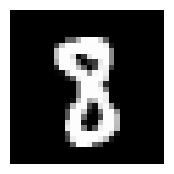

In [325]:
imagen, etiqueta = plot_img(train_set) #probar con True

Number: 9


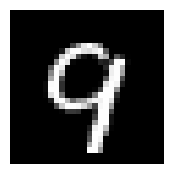

In [326]:
image, tag = plot_img(test_loader, True)


In [348]:
for i, (img, label) in enumerate(train_loader):
    print('i = ', i)
    #print(img)
    print('img.shape:', img.shape)
    print('type(img):', type(img))
    print('label:', label)
    print('label.shape:', label.shape) 
    print('type(label):', type(label)) 
    print('-'*5)
    if i == 1:
        break

i =  0
img.shape: torch.Size([64, 1, 28, 28])
type(img): <class 'torch.Tensor'>
label: tensor([9, 3, 1, 3, 9, 3, 4, 9, 7, 4, 7, 6, 1, 8, 5, 2, 0, 5, 9, 2, 7, 8, 2, 3,
        2, 7, 3, 5, 3, 7, 3, 6, 7, 9, 5, 0, 7, 5, 3, 9, 9, 4, 6, 7, 2, 2, 9, 3,
        1, 7, 2, 1, 5, 6, 4, 2, 3, 1, 2, 8, 2, 3, 3, 9])
label.shape: torch.Size([64])
type(label): <class 'torch.Tensor'>
-----
i =  1
img.shape: torch.Size([64, 1, 28, 28])
type(img): <class 'torch.Tensor'>
label: tensor([3, 2, 9, 9, 0, 1, 2, 9, 0, 0, 0, 8, 1, 2, 3, 5, 6, 2, 0, 3, 1, 0, 2, 1,
        7, 7, 1, 8, 0, 3, 4, 0, 1, 6, 7, 6, 8, 1, 3, 4, 9, 8, 7, 1, 1, 3, 5, 0,
        4, 0, 0, 0, 4, 5, 4, 9, 2, 3, 6, 4, 0, 8, 0, 7])
label.shape: torch.Size([64])
type(label): <class 'torch.Tensor'>
-----


imgs with train_set:for Conv2D need 4D -> [batch_size, Channel, H,W])


In [380]:
def Show_imgs(imgs, name,  size = 3, color = True):
  #color_m ='jet'
  if color == False:
    color_m ='gray'
  print('****************** ' + name  +  ' **************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))  
  fig = plt.figure(figsize=(rows*size, cols*size))
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      plt.imshow(imgs[i].detach(), cmap = 'gray')
  plt.show()

****************** Number **************************


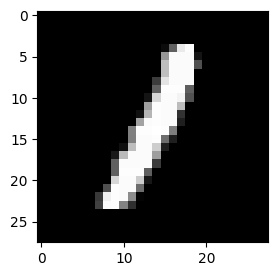

In [381]:
index = np.random.randint(len(train_set))
img, label = train_set[index]
Show_imgs(img, "Number")

In [382]:
print('before unsqueeze:', img.shape)
img = img.unsqueeze(0)
print('after unsqueeze:', img.shape)

before unsqueeze: torch.Size([1, 28, 28])
after unsqueeze: torch.Size([1, 1, 28, 28])


torch.Size([1, 4, 28, 28])
****************** nn.Conv2d **************************


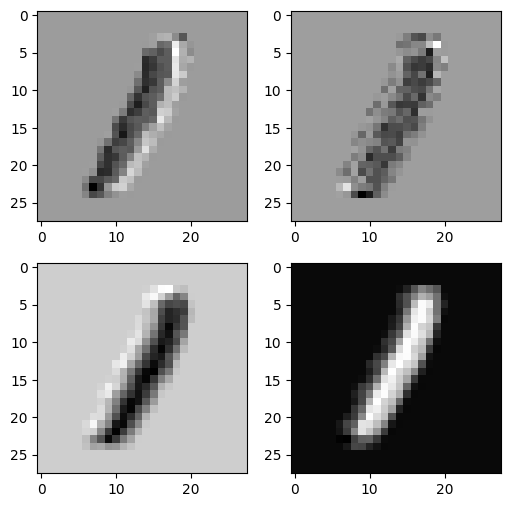

In [383]:
conv1 = nn.Conv2d(in_channels=1,out_channels=4, kernel_size=3, stride=1, padding=1)
out =  conv1(img)
print(out.shape)
Show_imgs(out[0],"nn.Conv2d")

****************** nn.ReLU() **************************


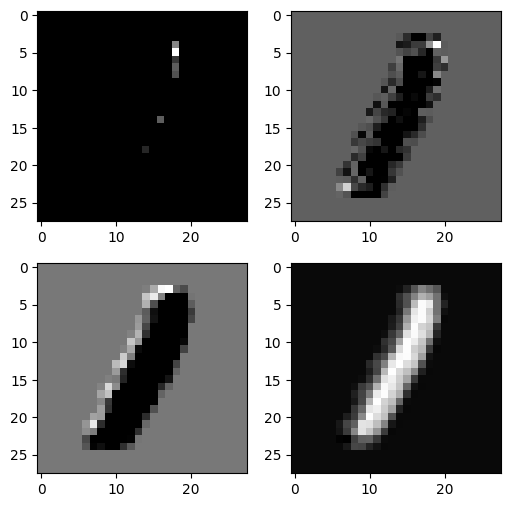

In [384]:
act = nn.ReLU()(out)
Show_imgs(act[0],"nn.ReLU()")

****************** nn.MAxPool2d **************************


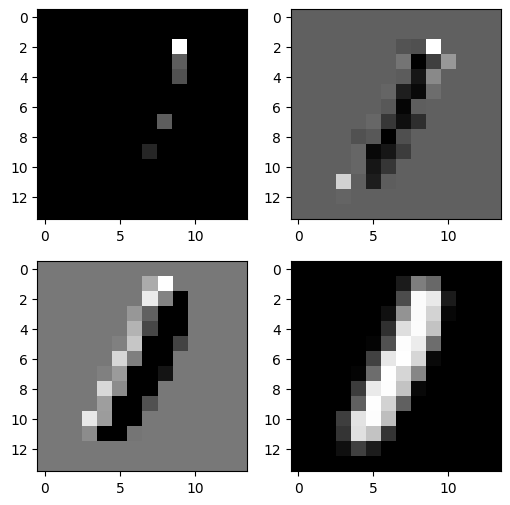

In [385]:
pool1 = nn.MaxPool2d(2,2)(act)
Show_imgs(pool1[0],"nn.MAxPool2d")

****************** layer 1 **************************


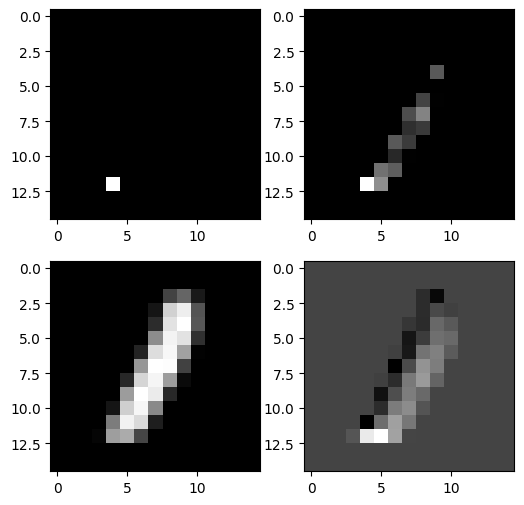

In [386]:
layer1 = nn.Sequential( nn.Conv2d(1,4,3,1,2) , nn.ReLU(), nn.MaxPool2d(2,2))
out = layer1(img)
Show_imgs(out[0], "layer 1")